In [1]:
import sys
print("Versao do python utilizada",sys.version)

Versao do python utilizada 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import joblib

In [9]:
df = pd.read_csv("C:\\Python\\titanic.csv")

In [10]:
df.head(11)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S

In [13]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.shape

(891, 12)

In [15]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
df.drop('Cabin', axis=1, inplace=True)

In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [20]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

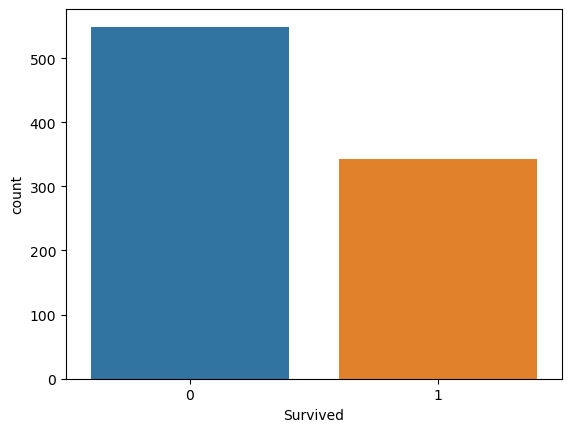

In [22]:
sns.countplot(x='Survived', data=df)
plt.show()

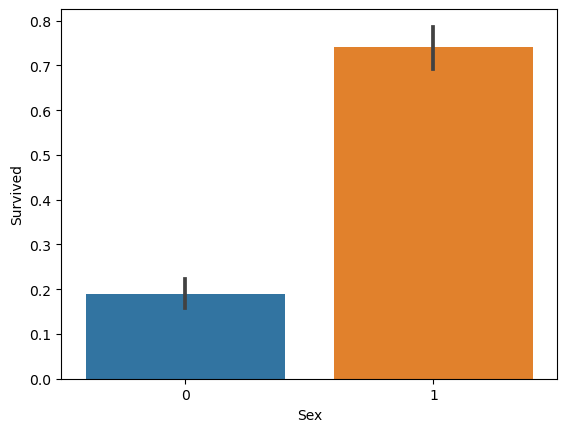

In [23]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

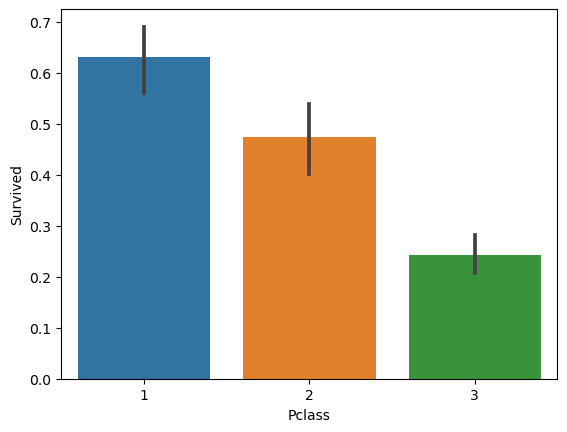

In [24]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

In [27]:
numeric_df = df.select_dtypes(include='number')

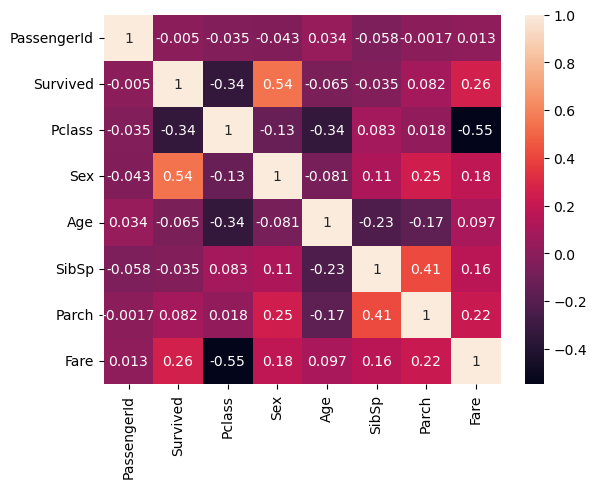

In [29]:
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [71]:
df.shape

(891, 12)

In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train_numeric = X_train.select_dtypes(include='number')

In [36]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [42]:
model = LogisticRegression(max_iter=2000)

In [50]:
X_train_cleaned = X_train.drop(columns=['Name', 'Ticket'])

X_train_encoded = pd.get_dummies(X_train_cleaned, drop_first=True)

model.fit(X_train_encoded, y_train)


LogisticRegression(max_iter=2000)

In [53]:
X_test_cleaned = X_test.drop(columns=['Name', 'Ticket'])
X_test_encoded = pd.get_dummies(X_test_cleaned, drop_first=True)

In [54]:
y_pred = model.predict(X_test_encoded)

In [56]:
y_pred = model.predict(X_test_encoded)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.45%


In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 16]
 [19 55]]


In [65]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [62]:
y_prob = model.predict_proba(X_test_encoded)[:, 1]

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [64]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_score:.2f}")

AUC: 0.88


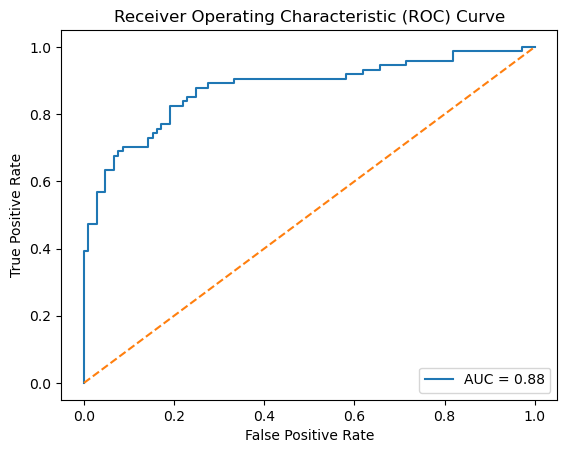

In [66]:
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [70]:
joblib.dump(model, 'modelo_titanic.pkl')

['modelo_titanic.pkl']

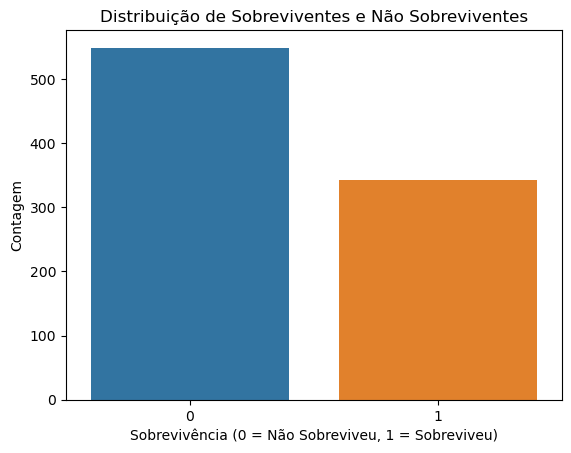

In [72]:
sns.countplot(x='Survived', data=df)
plt.title('Distribuição de Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobrevivência (0 = Não Sobreviveu, 1 = Sobreviveu)')
plt.ylabel('Contagem')
plt.show()


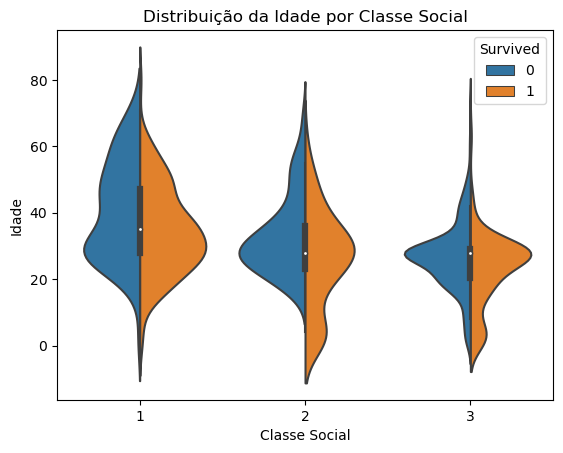

In [73]:
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True)
plt.title('Distribuição da Idade por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Idade')
plt.show()


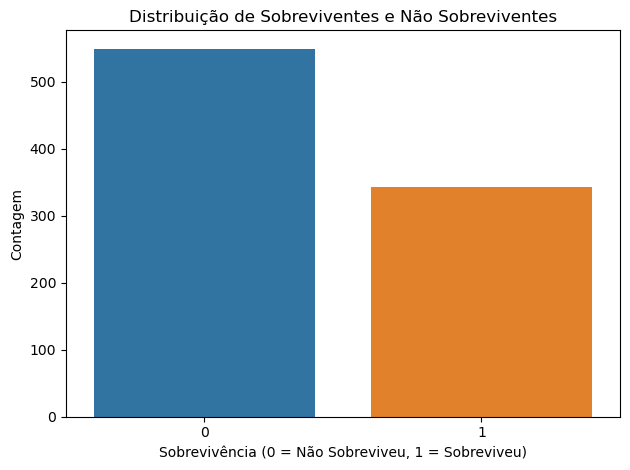

In [75]:
sns.countplot(x='Survived', data=df)
plt.title('Distribuição de Sobreviventes e Não Sobreviventes')
plt.xlabel('Sobrevivência (0 = Não Sobreviveu, 1 = Sobreviveu)')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

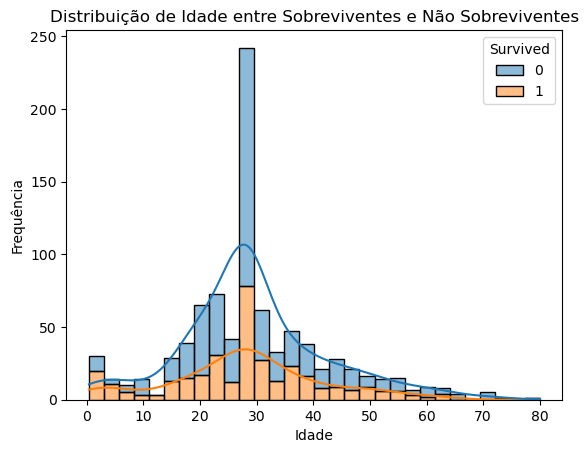

In [76]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=True)
plt.title('Distribuição de Idade entre Sobreviventes e Não Sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()